# A Comparative Study of Random Forest and K-Nearest Neighbors for Heart Failure Risk Prediction

## Project Domain
<p align="justify">
Cardiovascular diseases (CVDs) stand as a formidable health challenge worldwide, comprising a spectrum of conditions that affect the heart and blood vessels. These encompass coronary artery disease, heart failure, stroke, and peripheral artery disease, among others. The intricate cardiovascular system, consisting of the heart, blood vessels, and blood, serves the vital function of transporting oxygen, nutrients, and waste products throughout the body. Within this system, the heart propels oxygen-rich blood to tissues via arteries, while veins return oxygen-depleted blood to the heart, with capillaries facilitating the exchange of substances between blood and tissues. Despite medical advancements, CVDs remain the leading cause of mortality globally, claiming millions of lives each year and accounting for a significant portion of all deaths. 
</p>

## Import All Required Libraries

In [52]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as goo
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

## Data Wrangling Section
<p align="justify">
Data wrangling, also known as data munging, is the process of transforming raw data into a clean and usable format. 
It involves various steps, including data cleaning, integration, transformation, and enrichment, to prepare data for 
analysis or machine learning. This section included:

1. Data Gathering
2. Data Understanding
3. Data Assesing
4. Data Cleaning
</p>

### Data Gathering
<p align="justify">
Data gathering, also known as data collection, is the process of systematically acquiring information from various sources to gain insights, make decisions, or conduct research. 
It is a critical step in any data-driven project, whether in scientific research, business analytics, marketing, or other fields.
</p>

In [2]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

/bin/bash: line 1: kaggle: command not found


In [3]:
filezip = "heart-failure-prediction.zip"
zipped = zipfile.ZipFile(filezip, 'r')
zipped.extractall()
zipped.close()

In [64]:
df = pd.read_csv("heart.csv")
df.head(len(df))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Data Undestranding
<p align="justify">
Data understanding is a critical step in the data science and analytics process. 
It involves getting to know the data you have, its structure, content, and quality, and identifying the key insights it can offer. 
This phase is crucial as it lays the foundation for effective data analysis, modeling, and decision-making
</p>

<p align="justify">
Cardiovascular diseases (CVDs) stand as the primary cause of mortality on a global scale, claiming an estimated 17.9 million lives annually, which amounts to 31% of all deaths worldwide. A staggering four out of five CVD-related deaths stem from heart attacks and strokes, with a significant portion occurring prematurely, affecting individuals under the age of 70. Heart failure, a common consequence of CVDs, underscores the urgency for early detection and management. This dataset encompasses 11 features that offer potential insights for predicting the likelihood of heart disease. For individuals with cardiovascular disease or those at heightened risk due to factors such as hypertension, diabetes, hyperlipidemia, or pre-existing conditions, timely detection and effective management are critical, where the utilization of machine learning models can offer significant assistance.
</p>

1. `Age`: age of the patient [years]
2. `Sex`: sex of the patient [M: Male, F: Female]
3. `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. `RestingBP`: resting blood pressure [mm Hg]
5. `Cholesterol`: serum cholesterol [mm/dl]
6. `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease`: output class [1: heart disease, 0: Normal]

### Data Assesing
<p align="justify">
Data assessing is a crucial phase in the data analysis process where the quality, relevance, and reliability of the data are evaluated. 
This step ensures that the data is suitable for the intended analysis and that the insights derived from it will be accurate and trustworthy. 
</p>

In [5]:
df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Function for assesing data
def data_assesing(data):

    # Display the total number of NaN and Null values in each column, sorted in descending order
    print(f"Total NaN/Null Data per Column:\n{data.isna().sum().sort_values(ascending=False)}\n")
    
    # Display the shape of the dataset
    print(f"Data Shape:\n{data.shape}")

    # Total duplicted data in dataset
    print(f"\nTotal Duplicated Data: {data.duplicated().sum()}")

# Call the function for assesing dataset hour.csv
data_assesing(df)

Total NaN/Null Data per Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data Shape:
(918, 12)

Total Duplicated Data: 0


### Data Cleaning
<p align="justify">
Data cleaning, also known as data cleansing or data preprocessing, is a crucial step in preparing data for analysis or machine learning. 
It involves identifying and correcting errors, inconsistencies, and inaccuracies in the dataset to ensure the data is of high quality and
reliable for analysis.
</p>

<b>Note: This stage will not be done because the dataset used is already clean and can be used directly without having to clean it first.</b>

## Exploratory Data Analysis (EDA)
<p align="justify">
Exploratory Data Analysis (EDA) is a important step in the data analysis process that involves summarizing, visualizing, and understanding data to uncover patterns, detect anomalies, test hypotheses, and check assumptions. It serves as the foundation for more complex data analysis and modeling tasks.
</p>

There will be 2 sections for the exploratory data analysis section, namely <b>univariate analysis</b> and <b>multivariate analysis</b>

In [7]:
catf = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
numf = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [8]:
df.shape

(918, 12)

### Univariate Analysis
<p align="justify">
Univariate analysis is a fundamental technique in statistical analysis that focuses on examining the distribution and characteristics of a single variable at a time. It provides insights into the central tendency, dispersion, and shape of the variable's distribution, allowing for a deeper understanding of its behavior without considering the relationships with other variables.
</p>

In [66]:
# Define colors for Heart Disease categories
hd_color = ["#00ced1", "#8be04e"]

# Create a figure with subplots
fig = go.Figure()

# Add bar chart subplot
fig.add_trace(go.Bar(
    x=['Heart Disease', 'Normal'],
    y=df['HeartDisease'].value_counts(),
    marker_color=hd_color,
    name='Count',
    text=df['HeartDisease'].value_counts(),
    textposition='auto',
    showlegend=False,
))

# Add annotations to the bar chart
for i in range(len(df['HeartDisease'].value_counts())):
    fig.add_annotation(
        x=i,
        y=df['HeartDisease'].value_counts()[i],
        text=str(),
        showarrow=False,
        font=dict(size=15),
        yshift=10
    )

# Add pie chart subplot
fig.add_trace(go.Pie(
    values=df['HeartDisease'].value_counts(),
    textinfo='percent+label',
    domain=dict(x=[0.55, 1]),
    marker=dict(colors=hd_color),
    name='Percentage'
))

# Update layout
fig.update_layout(
    title='Heart Disease Distribution and Percentages',
    width=1000,
    height=500,
    grid=dict(rows=1, columns=2),
    xaxis_title='Heart Disease',
    yaxis_title='Count',
)

# Show figure
fig.show()


In [67]:
# Data
sex_label = ['Man', 'Women']
sex_color = ["#8be04e", "#ebdc78"]

# Distribution plot of Sex
fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=df['Sex'].value_counts().index,
    y=df['Sex'].value_counts().values,
    marker_color=sex_color,
    text=df['Sex'].value_counts().values,
    textposition='auto',
    showlegend=False  # Don't show legend entry for the bar chart
))

# Pie chart
fig.add_trace(go.Pie(
    labels=sex_label,
    values=df['Sex'].value_counts().values,
    hole=0.3,
    marker_colors=sex_color,
    textposition='inside',
    textinfo='percent+label',
    domain={'x': [0.6, 1]}  # Adjust the position of the pie chart
))

# Update layout
fig.update_layout(
    title_text="Sex Distribution and Percentages",
    width=1000,
    height=500,
    annotations=[
        dict(text=" ", x=0.25, y=-0.1, showarrow=False, font=dict(size=16)),
        dict(text=" ", x=0.85, y=-0.1, showarrow=False, font=dict(size=16)),
    ],
    grid=dict(rows=1, columns=2),
)

# Show figure
fig.show()


In [85]:
# Data
chestpain_label = ['ASY', 'ATA', 'NAP', 'TA']
chestpain_colors = ["#50e991", "#e6d800", "#9b19f5", "#ffa300"]

# Plotting the distribution of Chest Pain Type
fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=df['ChestPainType'].value_counts().index,
    y=df['ChestPainType'].value_counts().values,
    marker_color=chestpain_colors,
    text=df['ChestPainType'].value_counts().values,
    textposition='auto',
    showlegend=False  # Remove legend entry for the bar chart
))

# Update layout
fig.update_layout(
    title_text="Chest Pain Type Distribution and Percentages",
    width=1000,
    height=500,
)

# Show figure
fig.show()



In [12]:
# Data
angina_label = ['No', 'Yes']
angina_color = ["#fd7f6f", "#7eb0d5"]

# Count plot
fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=df['ExerciseAngina'].value_counts().index,
    y=df['ExerciseAngina'].value_counts().values,
    marker_color=angina_color,
    text=df['ExerciseAngina'].value_counts().values,
    textposition='auto',
    showlegend=False
))

# Pie chart
fig.add_trace(go.Pie(
    labels=angina_label,
    values=df['ExerciseAngina'].value_counts().values,
    hole=0.3,
    marker_colors=angina_color,
    textinfo='percent+label',
    name='Angina',
    domain={'x': [0.6, 1]}  # Adjust position of the pie chart
))

# Update layout
fig.update_layout(
    title_text="Angina Distribution and Percentages",
    width=1000,
    height=500,
    annotations=[
        dict(text=" ", x=0.25, y=-0.1, showarrow=False, font=dict(size=16)),
        dict(text=" ", x=0.75, y=-0.1, showarrow=False, font=dict(size=16)),
    ],
    grid=dict(rows=1, columns=2),
)

# Show figure
fig.show()

In [84]:
# Data
slope_label = ['Up', 'Flat', 'Down']
slope_color = ["#ffd700", "#ff6347", "#00ced1"]

# Count plot
fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=df['ST_Slope'].value_counts().index,
    y=df['ST_Slope'].value_counts().values,
    marker_color=slope_color,
    text=df['ST_Slope'].value_counts().values,
    textposition='auto',
    showlegend=False,
    name='Distribusi dari ST Slope'
))

# Update layout
fig.update_layout(
    title_text="ST Slope Distribution and Percentages ",
    width=1000,
    height=500,
)

# Show figure
fig.show()

In [14]:
# Define custom colors for each histogram
histogram_colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create subplots for each column
fig = go.Figure()

for i, column in enumerate(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], start=1):
    hist_data = df[column]
    
    # Add histogram trace to the subplot with custom color
    fig.add_trace(go.Histogram(x=hist_data, name=column, nbinsx=50, marker_color=histogram_colors[i-1], opacity=0.7))

# Update layout
fig.update_layout(
    title_text="Histograms of Age, RestingBP, Cholesterol, MaxHR, and Oldpeak",
    width=1000,
    height=500,
    barmode='overlay',
    xaxis_title="Value",
    yaxis_title="Frequency"
)

# Show figure
fig.show()

### Multivariate Analysis
<p align="justify">
Multivariate analysis is a statistical technique used to analyze and understand the relationships between multiple variables simultaneously. Unlike univariate analysis, which focuses on examining individual variables in isolation, multivariate analysis explores the interdependencies and interactions among multiple variables.
</p>

<Axes: >

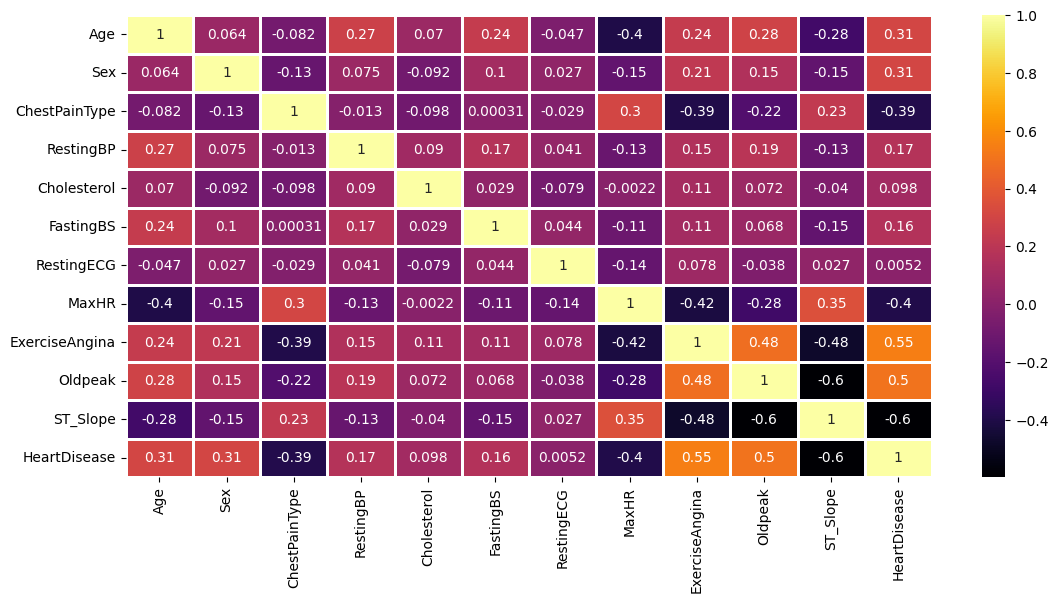

In [56]:
#Correlation between all features 
fig , ax = plt.subplots(figsize=(13,6))   
sns.heatmap(df.corr(), cmap="inferno", linecolor='white' , annot=True , linewidths=1 , ax=ax)

In [90]:
# Select only numerical columns for correlation matrix computation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr(method="pearson")

# Plot correlation matrix with Plotly
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Inferno',
                   zmin=-1, zmax=1,
                   hoverongaps = False,
                   text=corr_matrix.round(2),
                   hovertemplate='%{x} - %{y}: %{text}<extra></extra>'))

# Update layout
fig_heatmap.update_layout(
    title="Correlation Matrix",
    width=1000,
    height=500
)

# Display figure
fig_heatmap.show()

In [91]:
# Select only numerical columns for correlation matrix computation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr(method="pearson")

# Plot correlation matrix with Plotly
fig_heatmap = go.Figure()

# Create heatmap trace with text showing correlation values
heatmap_trace = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Inferno',  # Adjust colorscale as desired
    zmin=-1, zmax=1,
    hoverongaps=False,
    text=corr_matrix.round(2),  # Display rounded correlation values
    texttemplate='%{text}',  # Template to show only correlation values
    showscale=False  # Hide colorscale (optional)
)

# Add heatmap trace to the figure
fig_heatmap.add_trace(heatmap_trace)

# Update layout
fig_heatmap.update_layout(
    title="Correlation Matrix",
    width=1000,
    height=500,
    xaxis_title="Features",
    yaxis_title="Features"  # Add axis titles for clarity
)

# Display figure
fig_heatmap.show()

In [93]:
# Iterate through categorical features for analysis
for feature in catf[:-1]:  # Exclude the target variable
    # Create a count plot for each categorical feature
    fig = px.histogram(df, x='HeartDisease', color=feature, barmode='group', histfunc='count',
                       category_orders={feature: sorted(df[feature].unique())}, 
                       labels={'HeartDisease': 'Heart Disease', feature: feature}, 
                       title=f'Heart Disease Distribution Across {feature}',
                       color_discrete_sequence=px.colors.qualitative.Pastel)
    
    # Update layout
    fig.update_layout(
        bargap=0.2,
        width=1000,
        height=500
    )
    
    # Show plot
    fig.show()

## Data Preparation
<p align="justify">
Data preparation is a critical stage in the process of developing machine learning models, involving the 
transformation of data into a form suitable for modeling. 
This stage encompasses several key steps, including feature selection, data transformation, 
feature engineering, and dimensionality reduction.
</p>

### Data Selection
<p align="justify">
in this section the data will be selected if there is still a shortage or loss of a value that will be used during modeling.
</p>

<b>Note: because the data is already clean, and from the previous stage it has also been notified, so just proceed directly to the next stage.</b>

In [18]:
data_assesing(df)

Total NaN/Null Data per Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data Shape:
(918, 12)

Total Duplicated Data: 0


In [19]:
df.head(len(df))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Outliers Handling
<p align="justify">
Outliers are data points that deviate significantly from the majority of the dataset. They can arise due to variability in the data, errors in data collection, or unique events. Handling outliers is crucial because they can skew statistical analyses and lead to misleading conclusions. First step is visualize the outliers from various features like this boxplot below
</p>

In [20]:
# Create a subplot figure with 5 rows and 2 columns
fig = make_subplots(rows=5, cols=2, subplot_titles=('Age Distribution', 'Age Outliers',
                                                    'RestingBP Distribution', 'RestingBP Outliers',
                                                    'Cholesterol Distribution', 'Cholesterol Outliers',
                                                    'MaxHR Distribution', 'MaxHR Outliers',
                                                    'Oldpeak Distribution', 'Oldpeak Outliers'))

# Add boxplots for outliers
fig.add_trace(goo.Box(y=df['Age'], name='Age Outliers', marker_color='DeepPink'), row=1, col=2)
fig.add_trace(goo.Box(y=df['RestingBP'], name='RestingBP Outliers', marker_color='DarkSlateGray'), row=2, col=2)
fig.add_trace(goo.Box(y=df['Cholesterol'], name='Cholesterol Outliers', marker_color='Green'), row=3, col=2)
fig.add_trace(goo.Box(y=df['MaxHR'], name='MaxHR Outliers', marker_color='Red'), row=4, col=2)
fig.add_trace(goo.Box(y=df['Oldpeak'], name='Oldpeak Outliers', marker_color='Brown'), row=5, col=2)

# Update layout
fig.update_layout(
    title="Boxplots Showing Outliers for Various Features",
    height=1000,
    width=800,
    showlegend=False
)

# Show figure
fig.show()

In [21]:
df.loc[ df['Cholesterol'] == 0, 'Cholesterol'] == np.nan
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

In [22]:
# Calculate Q1, Q3, and IQR for outlier removal
Q1 = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].quantile(0.25)
Q3 = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
dfoutlier = df[~((df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] < (Q1 - 1.5 * IQR)) | 
                  (df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a subplot figure with 5 rows and 2 columns
fig = make_subplots(rows=5, cols=2, subplot_titles=('Age Distribution', 'Age Outliers',
                                                    'RestingBP Distribution', 'RestingBP Outliers',
                                                    'Cholesterol Distribution', 'Cholesterol Outliers',
                                                    'MaxHR Distribution', 'MaxHR Outliers',
                                                    'Oldpeak Distribution', 'Oldpeak Outliers'))

# Add histograms for distributions
fig.add_trace(goo.Histogram(x=dfoutlier['Age'], name='Age', marker_color='DeepPink'), row=1, col=1)
fig.add_trace(goo.Histogram(x=dfoutlier['RestingBP'], name='RestingBP', marker_color='DarkSlateGray'), row=2, col=1)
fig.add_trace(goo.Histogram(x=dfoutlier['Cholesterol'], name='Cholesterol', marker_color='Green'), row=3, col=1)
fig.add_trace(goo.Histogram(x=dfoutlier['MaxHR'], name='MaxHR', marker_color='Red'), row=4, col=1)
fig.add_trace(goo.Histogram(x=dfoutlier['Oldpeak'], name='Oldpeak', marker_color='Brown'), row=5, col=1)

# Add boxplots for outliers
fig.add_trace(goo.Box(y=dfoutlier['Age'], name='Age Outliers', marker_color='DeepPink'), row=1, col=2)
fig.add_trace(goo.Box(y=dfoutlier['RestingBP'], name='RestingBP Outliers', marker_color='DarkSlateGray'), row=2, col=2)
fig.add_trace(goo.Box(y=dfoutlier['Cholesterol'], name='Cholesterol Outliers', marker_color='Green'), row=3, col=2)
fig.add_trace(goo.Box(y=dfoutlier['MaxHR'], name='MaxHR Outliers', marker_color='Red'), row=4, col=2)
fig.add_trace(goo.Box(y=dfoutlier['Oldpeak'], name='Oldpeak Outliers', marker_color='Brown'), row=5, col=2)

# Update layout
fig.update_layout(
    title="Distributions and Outliers of Various Features",
    height=1000,
    width=1200,
    showlegend=False
)

# Show figure
fig.show()

In [23]:
df = dfoutlier
df.head(len(df))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Label Encoder

In [24]:
ChestPainType_label = LabelEncoder()
RestingECG_label = LabelEncoder()
ExerciseAngine_label = LabelEncoder()
ST_Slope_label = LabelEncoder()
Sex_label = LabelEncoder()

df['ChestPainType'] = ChestPainType_label.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_label.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ExerciseAngine_label.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ST_Slope_label.fit_transform(df['ST_Slope'])
df['Sex'] = Sex_label.fit_transform(df['Sex'])

In [25]:
df.head(len(df))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### Dataset Splitting

In [26]:
x = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease

In [27]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [28]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"Train Set: {x_train.shape}\nTest Set: {x_test.shape}")

Train Set: (561, 11)
Test Set: (141, 11)


### Standarization

In [30]:
# Standard scaling
std_scaler = StandardScaler()
std_scaler.fit(x_train)

x_train = std_scaler.transform(x_train)
x_test = std_scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

## Modeling Section
<p align="justify">
In the modeling section, the focus was on developing predictive models to address the research goals. The dataset underwent meticulous preparation, 
including handling missing values, encoding categorical variables, and normalizing numerical features. Despite encountering challenges such as 
imbalanced data distributions, solutions were successfully implemented.
</p>

In [41]:
# Model fitting and prediction for KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
ypred_train_knn = knn.predict(x_train)
ypred_test_knn = knn.predict(x_test)

# Model fitting and prediction for Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
ypred_train_rf = rf.predict(x_train)
ypred_test_rf = rf.predict(x_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    return accuracy, f1, precision, recall

# Calculating metrics for KNN
train_accuracy_knn, train_f1_knn, train_precision_knn, train_recall_knn = calculate_metrics(y_train, ypred_train_knn)
test_accuracy_knn, test_f1_knn, test_precision_knn, test_recall_knn = calculate_metrics(y_test, ypred_test_knn)

# Calculating metrics for Random Forest
train_accuracy_rf, train_f1_rf, train_precision_rf, train_recall_rf = calculate_metrics(y_train, ypred_train_rf)
test_accuracy_rf, test_f1_rf, test_precision_rf, test_recall_rf = calculate_metrics(y_test, ypred_test_rf)

# Storing the results in a DataFrame
model_results = pd.DataFrame({
    'KNN Accuracy': [train_accuracy_knn, test_accuracy_knn],
    'KNN F1': [train_f1_knn, test_f1_knn],
    'KNN Precision': [train_precision_knn, test_precision_knn],
    'KNN Recall': [train_recall_knn, test_recall_knn],
    'RF Accuracy': [train_accuracy_rf, test_accuracy_rf],
    'RF F1': [train_f1_rf, test_f1_rf],
    'RF Precision': [train_precision_rf, test_precision_rf],
    'RF Recall': [train_recall_rf, test_recall_rf]
}, index=['Train', 'Test'])

# Display the results
model_results.head()

,KNN Accuracy,KNN F1,KNN Precision,KNN Recall,RF Accuracy,RF F1,RF Precision,RF Recall
Train,0.893048,0.893082,0.893138,0.893048,1.000000,1.000000,1.000000,1.000000
Test,0.907801,0.907792,0.907874,0.907801,0.900709,0.900709,0.900709,0.900709


## Model Evaluation

In [42]:
# Create a dictionary for each algorithm used, mapping names to their respective model objects
model_dict = {'KNN': knn, 'RandomForest': rf}

In [43]:
# Create subplots for each metric
fig = make_subplots(rows=2, cols=2, subplot_titles=("Accuracy", "F1 Score", "Precision", "Recall"))

# Add traces for KNN
fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_accuracy_knn, test_accuracy_knn], name="KNN"),
    row=1, col=1
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_f1_knn, test_f1_knn], name="KNN"),
    row=1, col=2
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_precision_knn, test_precision_knn], name="KNN"),
    row=2, col=1
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_recall_knn, test_recall_knn], name="KNN"),
    row=2, col=2
)

# Add traces for Random Forest
fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_accuracy_rf, test_accuracy_rf], name="Random Forest"),
    row=1, col=1
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_f1_rf, test_f1_rf], name="Random Forest"),
    row=1, col=2
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_precision_rf, test_precision_rf], name="Random Forest"),
    row=2, col=1
)

fig.add_trace(
    goo.Bar(x=["Train", "Test"], y=[train_recall_rf, test_recall_rf], name="Random Forest"),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title="Model Evaluation Metrics",
    height=800,
    width=1000,
    legend=dict(x=1.05, y=0.5)
)

# Show plot
fig.show()

In [47]:
# Assuming x_test, y_test, x_train, y_train, and model_dict are already defined and models are trained

# Ensure the models are fitted
for name, model in model_dict.items():
    if not hasattr(model, "predict"):
        raise ValueError(f"The model '{name}' is not fitted or does not have a predict method.")

# Predictions for x_test
x_test_samples = x_test.iloc[:10].copy()
test_predictions = {'Test True Y': y_test[:10].values}  # Ensure y_test is in the correct format

for model_name, model in model_dict.items():
    try:
        test_predictions['Prediction ' + model_name] = model.predict(x_test_samples).round(1)
    except Exception as e:
        print(f"Error predicting with model {model_name}: {e}")

test_predictions_df = pd.DataFrame(test_predictions)

# Predictions for x_train
x_train_samples = x_train.iloc[:10].copy()
train_predictions = {'Train True Y': y_train[:10].values}  # Ensure y_train is in the correct format

for model_name, model in model_dict.items():
    try:
        train_predictions['Prediction ' + model_name] = model.predict(x_train_samples).round(1)
    except Exception as e:
        print(f"Error predicting with model {model_name}: {e}")

train_predictions_df = pd.DataFrame(train_predictions)

In [48]:
# Display DataFrames
print("Test Predictions:")
test_predictions_df.head(len(test_predictions_df))

Test Predictions:


,Test True Y,Prediction KNN,Prediction RandomForest
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
5,1,1,1
6,0,0,1
7,0,1,1
8,0,1,0
9,1,1,1


In [49]:
print("\nTrain Predictions:")
train_predictions_df.head(len(train_predictions_df))


Train Predictions:


,Train True Y,Prediction KNN,Prediction RandomForest
0,1,1,1
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
5,0,0,0
6,0,0,0
7,1,1,1
8,0,0,0
9,0,0,0
